# Individual Coursework - European Call Option for PayPal (PYPL)

## Using both Binomial Tree and Black Scholes methods

### Including Greeks calculations for Risk Management 

###### 

**Installing yfinance package to connect to the Yahoo Finance API.**

In [198]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [199]:
import yfinance as yf
import numpy as np
import pandas as pd
import os
import matplotlib as mlp
import scipy.stats as si
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Downloading a one year historical data of Paypal from Yahoo Finance using Python**

In [200]:
data = yf.download("PYPL", start="2020-11-25", end="2021-11-26") 

[*********************100%***********************]  1 of 1 completed


**Downloading a one year historical data of the Volatility Index from Yahoo Finance using Python** 

In [201]:
initial_data = yf.download("PYPL ^VIX", start= "2020-11-25", end="2021-11-26")

[*********************100%***********************]  2 of 2 completed


**Showing downloaded daily data for the first 5 days** 

In [202]:
initial_data.head()

Adj Close              Close               High             \
                  PYPL   ^VIX        PYPL   ^VIX        PYPL       ^VIX   
Date                                                                      
2020-11-25  214.460007  21.25  214.460007  21.25  216.070007  22.500000   
2020-11-27  211.389999  20.84  211.389999  20.84  213.839996  21.600000   
2020-11-30  214.119995  20.57  214.119995  20.57  215.830002  22.889999   
2020-12-01  216.539993  20.77  216.539993  20.77  220.570007  20.920000   
2020-12-02  212.559998  21.17  212.559998  21.17  215.750000  21.250000   

                   Low                   Open               Volume       
                  PYPL       ^VIX        PYPL       ^VIX      PYPL ^VIX  
Date                                                                     
2020-11-25  206.229996  21.129999  206.289993  21.650000  13817500    0  
2020-11-27  208.619995  19.510000  213.199997  21.520000   5363200    0  
2020-11-30  207.089996  20.480000  212.509995  22.639999  12976100    0  
2020-12-01  214.339996  20.000000  217.149994  20.209999  10137400    0  
2020-12-02  210.500000  20.040001  215.600006  21.000000   7537400    0

**Showing downloaded daily data for the last 5 days**

In [203]:
initial_data.tail()

Adj Close                  Close                   High  \
                  PYPL       ^VIX        PYPL       ^VIX        PYPL   
Date                                                                   
2021-11-18  200.500000  17.590000  200.500000  17.590000  207.500000   
2021-11-19  193.610001  17.910000  193.610001  17.910000  202.500000   
2021-11-22  189.479996  19.170000  189.479996  19.170000  193.899994   
2021-11-23  188.050003  19.379999  188.050003  19.379999  190.789993   
2021-11-24  188.710007  18.580000  188.710007  18.580000  189.639999   

                              Low                   Open               Volume  \
                 ^VIX        PYPL       ^VIX        PYPL       ^VIX      PYPL   
Date                                                                            
2021-11-18  18.150000  199.199997  16.379999  206.990005  16.809999  19980100   
2021-11-19  19.010000  193.070007  17.230000  202.190002  17.360001  24607500   
2021-11-22  19.590000  184.274994  17.350000  193.619995  18.200001  29956600   
2021-11-23  20.910000  185.199997  19.030001  189.154999  20.240000  20004500   
2021-11-24  20.959999  184.740005  18.520000  187.000000  19.170000  13359100   

                 
           ^VIX  
Date             
2021-11-18    0  
2021-11-19    0  
2021-11-22    0  
2021-11-23    0  
2021-11-24    0

**Defining (data) to capture only the adjusted close price from the initial data, and ensuring that the full year contains 252 days which is a full trading year.**

In [204]:
data = initial_data['Adj Close']
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-25 to 2021-11-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PYPL    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [205]:
data.head()

,PYPL,^VIX
Date,,
2020-11-25,214.460007,21.25
2020-11-27,211.389999,20.84
2020-11-30,214.119995,20.57
2020-12-01,216.539993,20.77
2020-12-02,212.559998,21.17


In [206]:
data.tail()

,PYPL,^VIX
Date,,
2021-11-18,200.500000,17.590000
2021-11-19,193.610001,17.910000
2021-11-22,189.479996,19.170000
2021-11-23,188.050003,19.379999
2021-11-24,188.710007,18.580000


**Plotting the movement of historical stock price of Paypal and its volatility for 1 year**

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

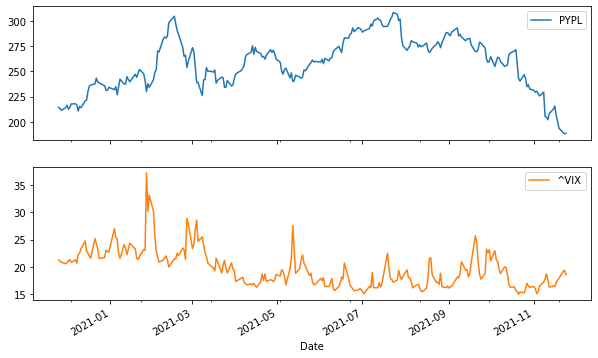

In [207]:
data.plot(figsize=(10, 6), subplots=True) 

**The below is the Statistics Summary of data which shows important analysis of the stock**

In [208]:
data.describe().round(2) 

,PYPL,^VIX
count,252.00,252.00
mean,257.75,19.68
std,25.95,3.40
min,188.05,15.01
25%,239.88,17.01
50%,260.04,18.82
75%,276.36,21.59
max,308.53,37.21


**Showing the percentage of change day-on-day for the first five days, rounded to 4 decimals**

In [209]:
data.pct_change().round(4).head() 

,PYPL,^VIX
Date,,
2020-11-25,NaN,NaN
2020-11-27,-0.0143,-0.0193
2020-11-30,0.0129,-0.0130
2020-12-01,0.0113,0.0097
2020-12-02,-0.0184,0.0193


**Showing the percentage of change day-on-day for the last five days, rounded to 4 decimals**

In [210]:
data.pct_change().round(4).tail() 

,PYPL,^VIX
Date,,
2021-11-18,-0.0280,0.0281
2021-11-19,-0.0344,0.0182
2021-11-22,-0.0213,0.0704
2021-11-23,-0.0075,0.0110
2021-11-24,0.0035,-0.0413


**Calculating the log return to show the continously compounded returns for PayPal for the first five days**

In [211]:
returns = np.log(data / data.shift(1)) 
returns.head().round(4)

,PYPL,^VIX
Date,,
2020-11-25,NaN,NaN
2020-11-27,-0.0144,-0.0195
2020-11-30,0.0128,-0.0130
2020-12-01,0.0112,0.0097
2020-12-02,-0.0186,0.0191


**Calculating the log return to show the continously compounded returns for PayPal for the last five days**

In [212]:
returns = np.log(data / data.shift(1)) 
returns.tail().round(4)

,PYPL,^VIX
Date,,
2021-11-18,-0.0284,0.0277
2021-11-19,-0.0350,0.0180
2021-11-22,-0.0216,0.0680
2021-11-23,-0.0076,0.0109
2021-11-24,0.0035,-0.0422


**Plotting the exponential daily return which shows the starting point at 1 as any exponential to the power of zero is always 1**

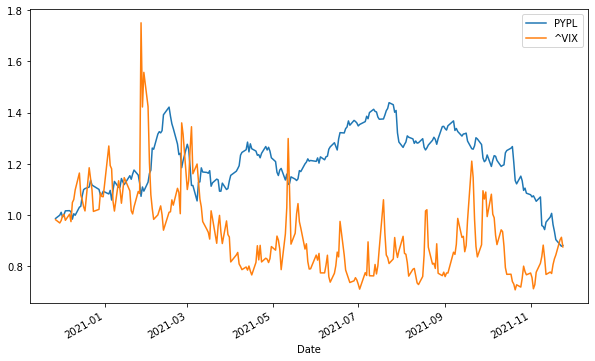

In [213]:
returns.cumsum().apply(np.exp).plot(figsize=(10, 6)); 

**Changing the frequency to 1 week to show the closing price of the last day of every week for the first 5 weeks of the year**

In [214]:
data.resample('1w', label='right').last().head() 

,PYPL,^VIX
Date,,
2020-11-29,211.389999,20.840000
2020-12-06,217.770004,20.790001
2020-12-13,214.059998,23.309999
2020-12-20,236.449997,21.570000
2020-12-27,238.639999,21.530001


**Changing the frequency to 1 week to show the closing price of the last day of every week for the last 5 weeks of the year**

In [238]:
data.resample('1w', label='right').last().tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-31,235.429993,238.899994,231.710007,232.589996,232.589996,13010800
2021-11-07,230.000000,230.419998,224.600006,225.779999,225.779999,16633100
2021-11-14,203.250000,210.020004,201.483994,208.300003,208.300003,20923000
2021-11-21,202.190002,202.500000,193.070007,193.610001,193.610001,24607500
2021-11-28,187.000000,189.639999,184.740005,188.710007,188.710007,13359100


**Changing the frequency to 1 month to show the closing price of the last day of each month for the first 5 months of the year**

In [216]:
data.resample('1m', label='right').last().head() 

,PYPL,^VIX
Date,,
2020-11-30,214.119995,20.570000
2020-12-31,234.199997,22.750000
2021-01-31,234.309998,33.090000
2021-02-28,259.850006,27.950001
2021-03-31,242.839996,19.400000


**Changing the frequency to 1 month to show the closing price of the last day of each month for the last 5 months of the year**

In [237]:
data.resample('1m', label='right').last().tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-31,280.244995,280.500000,274.209991,275.529999,275.529999,11685700
2021-08-31,290.929993,292.649994,284.339996,288.660004,288.660004,8911800
2021-09-30,259.649994,263.470001,258.730011,260.209991,260.209991,5321700
2021-10-31,235.429993,238.899994,231.710007,232.589996,232.589996,13010800
2021-11-30,187.000000,189.639999,184.740005,188.710007,188.710007,13359100


## Designing a European Call Option for PayPal using Binomial Tree

**First I started by calculating the log return for the historical one year daily data of PYPL stock**

In [218]:
log_return = np.log(data['PYPL'] / data['PYPL'].shift(1))

**Then I calculated the annualised volatility of the stock to be used in the option input, I multiplied the daily log return by the square root of 252 as the frequency of data is daily and the sample size is 1 year**

In [408]:
Vol = np.sqrt(252) * log_return.std()
print('The annualised volatility of PYPL is' , round(Vol*100,2), '%')

The annualised volatility of PYPL is 36.41 %


In [220]:
data = yf.download("PYPL", start="2020-11-25", end="2021-11-26")

[*********************100%***********************]  1 of 1 completed


**Showing the spot price to be used in the option input**

In [221]:
SP = data['Adj Close'][-1]
print('The spot price is', round(SP,2))

The spot price is 188.71


**Designing a European call option:**


- Spot price (S0) is USD 188.71 as adj close price on 24th November 2021.
- Strike price (K) is set at USD 260.0 for the call option because the mean price for 1 year was USD 257.75 as shown in the data description table. From the sell side prespective, designing a 1 year call option around the yearly average stock price would put me in "in the money" position.
- The option time to expiry (T) is designed to be 1 year.
- The Risk free rate (r) is 1.46% which represents the return on the 10-year US treasuries and is sourced from Bloomberg (https://www.bloomberg.com/markets/rates-bonds/government-bonds/us).
- The volatility (Sig) is 36.41% as calculated on Python above.
- The number of time steps (N) is set to be 4 steps.
- The payoff is set to be a "Call" option.

In [456]:
S0 = 188.71            
K = 260.0              
T = 1                
r = 0.0146             
Sig = 0.3641          
N = 4                  
payoff = 'call'        

**Then I input the equation for Delta t and calculated the up and down factors**

In [457]:
dT = float(T) / N                             # Delta t
u = np.exp(Sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [458]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

**Since I am using the Binomial Tree method and I selected 4 time steps, the below array shows the value of the option at each time step and then works backwards through the tree until it reaches the first node which is the valuation date**

In [459]:
S

array([[188.71      , 226.39051377, 271.59485308, 325.8253316 ,
        390.88423624],
       [  0.        , 157.3010437 , 188.71      , 226.39051377,
        271.59485308],
       [  0.        ,   0.        , 131.11980472, 157.3010437 ,
        188.71      ],
       [  0.        ,   0.        ,   0.        , 109.29618003,
        131.11980472],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         91.10488681]])

**Then I calculated the original portfolio value using the risk free compounded return plus the change in value up and down, and then I calculated the Risk Neutral Probability**

In [460]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4646005584109205

In [461]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        130.88423624],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         11.59485308],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

In [462]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[  8.4640296 ,  16.95907991,  33.77276767,  66.77260178,
        130.88423624],
       [  0.        ,   1.15013523,   2.48458784,   5.3673486 ,
         11.59485308],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ]])

**Since (S > K) and it is a Call Option, the value of the option returned the first node which is $8.464**

In [463]:
print('European ' + payoff , str( V[0,0]))

European call 8.4640296014053


## Designing a European Call Option for PayPal using Black Scholes

**Input for the Euopean Call Option design:** 

- Spot price (S) is USD 188.71 as adj close price on 24th November 2021.
- Strike price (K) is set at USD 260.0 for the call option because the mean price for 1 year was USD 257.75 as shown in the data description table. From the sell side prespective, designing a 1 year call option around the yearly average stock price would put me in "in the money" position.
- The option time to expiry (T) is designed to be 1 year.
- The Risk free rate (r) is 1.46% which represents the return on the 10-year US treasuries and is sourced from Bloomberg (https://www.bloomberg.com/markets/rates-bonds/government-bonds/us).
- The volatility (Sig) is 36.41% as calculated on Python above.
- The number of time steps (N) is set to be 4 steps.
- The payoff is set to be a "Call" option.

**Then I calculated d1 and d2 using the equation for Black Scholes pricing model**

In [118]:
def European_option_BS(S, K, T, r, Sig, payoff):
    
    #S: spot price as adj close price on 30th November 2021 (in USD)
    #K: strike price is set at USD 270 for the call option because the mean price for 1 year was USD 257.64 and from the sell side prespective, designing the call slightly higher that its mean would put me in "in the money" position
    #T: the option maturity is 1 year
    #r: risk free rate for 10-year US treasuries sourced from Bloomberg (https://www.bloomberg.com/markets/rates-bonds/government-bonds/us)
    #Sig: Volatility is calculated on Python as shown above
    #payoff: payoff is a European Call Option
    
    d1 = (np.log(S / K) + (r + 0.5 * Sig ** 2) * T) / (Sig * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * Sig ** 2) * T) / (Sig * np.sqrt(T))
    if payoff == 'call':
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == 'put':
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [464]:
European_option_BS (188.71, 260.0, 1.0, 0.0146, 0.3641, 'call').round(3)

8.874

**The below graph depicts the Call Option price with respect to the stock price. It clearly shows that from a seller point of view, I am ITM as long as the stock price is less than the strike price USD 260, however it turns OTM from the seller prespective once the stock price exceeded the spot price i.e > USD 260, which is unlikely given the 1 year histotical average stock price of USD 157.75**

In [232]:
S = np.linspace(150,350,21)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = European_option_BS(S[i], 260, 1, 0.0146, 0.3641, 'call')

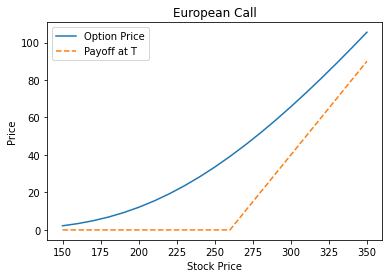

In [233]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-260,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

## GREEKS FOR RISK MANAGEMENT

## Delta 

**The below Delta calculations are performed to measure the sensitivity of the call option price to the change in Paypal stock price**

**The value of Delta is 0.255 which means that for every increase in PayPal stock price by 1 dollar, the value of the call option increases by $0.255.**

In [122]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [239]:
delta(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(3)

0.255

In [261]:
S = np.linspace(150,350,21)
Delta_Call = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 260, 1, 0.0146, 0.0, 0.3641, 'call')

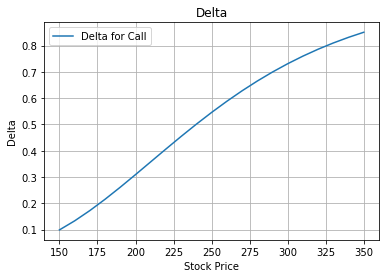

In [262]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

**The 2D graph illustrates that the value of the call option increases as the stock price increases.**

In [124]:
S = np.linspace(150, 350, 51)
T = np.linspace(0.25, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

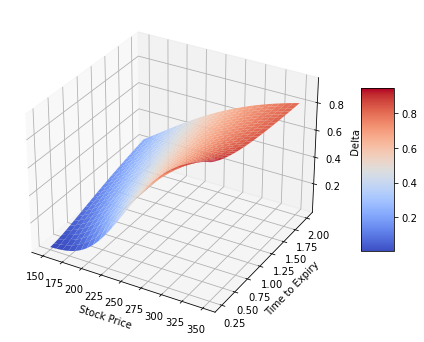

In [125]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

**The 3D graph for Delta surface depicts the increase in stock price in respect to the option time to expiry while showing its delta. It illustrates that the value of the call option increases as the stock price increases.**

## Gamma 

**The below Gamma calculations are performed to measure the rate of change in the delta in relation to changes in PayPal stock price**

**The value of Gamma is 0.005 which means that for every increase in PayPal stock price by 1 dollar, the rate of change in the option's delta is 0.005**

In [126]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [240]:
gamma(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(3)

0.005

In [375]:
S = np.linspace(150,350,21)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call')

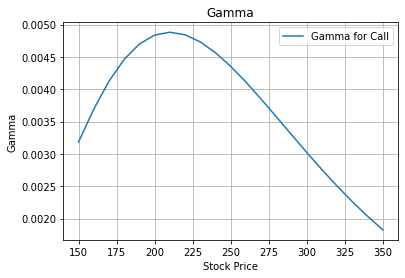

In [376]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

**The 2D graph for Gamma shows that it is at its highest when the option is at the money, and is at its lowest when it is further out of the money or in the money.**

In [273]:
S = np.linspace(120, 350, 51)
T = np.linspace(0.25, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

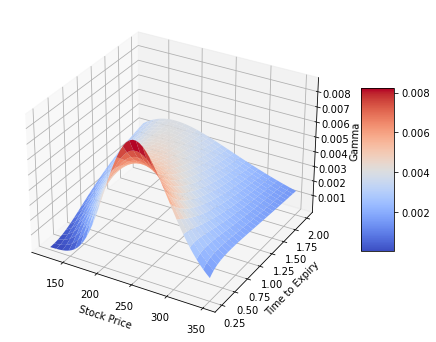

In [274]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

**The 3D graph for Gamma surface shows that Gamma is at its highest when the option is at the money, and is at its lowest when it is further out of the money.**

## Theta

**The below calculations of Theta are performed to measure the sensitivity of the value of the call option to the passage of time**

**The below calculation shows that Theta is equal to 11.611 which means that the price of the call option will decrease each year by USD 11.611 or USD 0.046 each day as the option nears expiration. This kind of price erosion over time is known as time decay where the option loses its  extrinsic value as time passes**.

In [409]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [413]:
theta(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(3)

11.611

In [414]:
T = np.linspace(0.07,1,51)
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(187.79, 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

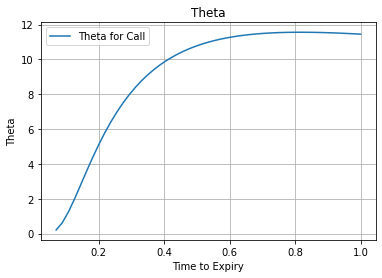

In [415]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call']) 

**Since this is a written (short) call option,The 2D graph for Theta is clearly showing that Theta decreases as the option's time to expiry approaches.**

In [417]:
S = np.linspace(150, 350, 51)
T = np.linspace(0.25, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

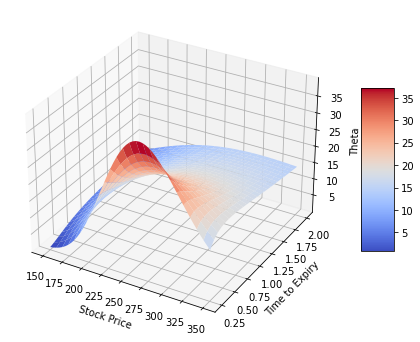

In [418]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

**The 3D graph for Theta surface shows that when the option is ITM or ATM its price erosion will increase as time to expiry approaches, while the erosion of OOTM option price will decrease as expiration approaches.**

## Speed

**The below Speed calculations are performed to measure the rate of change in Gamma in relation to changes in PayPal stock price**

**The value of Speed is technically 0.0 which means that for every increase in PayPal stock price by 1 dollar, the rate of change in the option's Gamma is 0.0**

In [343]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [344]:
speed(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(10)

2.00027e-05

In [379]:
S = np.linspace(100,350,21)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call')

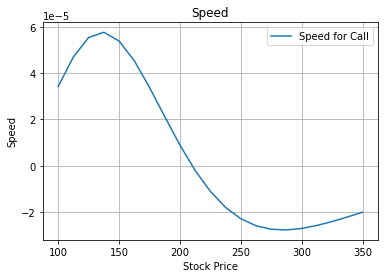

In [380]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

In [381]:
S = np.linspace(150, 350, 51)
T = np.linspace(0.25, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

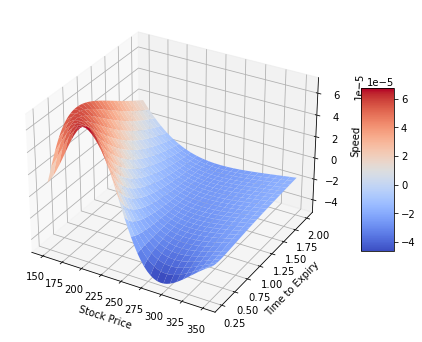

In [382]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho

**The below Rho calculations are performed to measure the sentisitivity of the option value to changes in the risk free rate.**

**Rho equals to 39.296 which means the value of the call option would increase by that amount for every increase of a 100 basis points per annum in the risk free rate.**

In [420]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [421]:
rho(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(3)

39.296

In [422]:
r = np.linspace(0.01,0.02,11)
Rho_Call = np.zeros((len(r),1))

for i in range(len(r)):
    Rho_Call [i] = rho(188.71, 260.0, 1.0, r[i], 0.0, 0.3641, 'call')

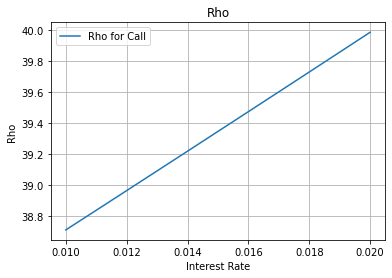

In [423]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

**The 2D graph shows that the value of Rho is increasing as the interest rate increases.**

In [424]:
S = np.linspace(150, 350, 51)
T = np.linspace(0.25, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')


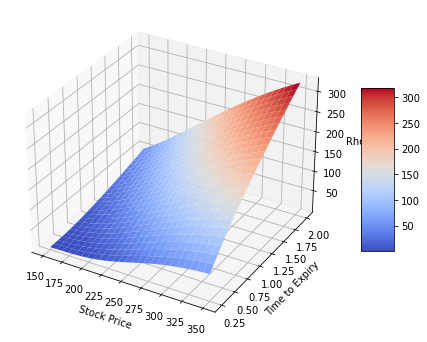

In [425]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

**The 3D graph shows that the value of Rho is increasing in respect to increases in the stock price and time to expiry of the option.**

### Vega

**The below Vega calculations are performed to measure the sensitivity of the option value to the volatility of PayPal stock.**

**Vega equals to 60.629 which means that for every increase in the volatility of PayPal share by a 100 basis points, the value of the call option will increase by $0.60629.**

In [367]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    if payoff == "call":
        vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    elif payoff == "put":
        vega = - S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [429]:
vega(188.71, 260.0, 1.0, 0.0146, 0.0, 0.3641, 'call').round(3)

60.629

In [369]:
vol = np.linspace(0.1,0.8,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(188.71, 260.0, 1.0, 0.0146, 0.0, vol[i], 'call')

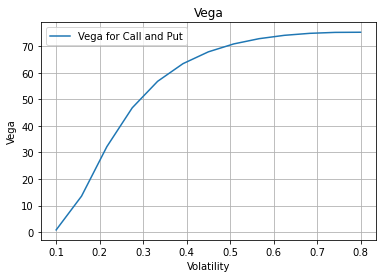

In [370]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

**The 2D graph shows the positive correlation between the increase in the volatility of the stock and the increase in its vega**

In [430]:
S = np.linspace(150, 350, 51)
T = np.linspace(0.25, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 260.0, T[i], 0.0146, 0.0, 0.3641, 'call')

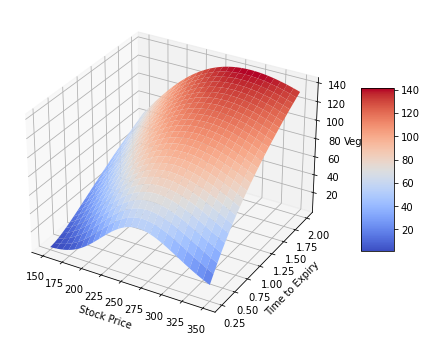

In [145]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);